In [ ]:
!pip install geopandas==0.9.0

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import FunctionTransformer
from shapely.geometry import Point

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_PATH = 'drive/MyDrive/data'
lsms_path = f'{DATA_PATH}/processed/_all_real.csv'
country_shapes_path = f'{DATA_PATH}/country_shapes'
FIGS_PATH = 'drive/MyDrive/figs'

In [6]:
df = gpd.read_file(lsms_path)
df = df[df.lat != "0.0"]
df = df[df.lon != "0.0"]
crs = {"init": "epsg:4326"}
geometry = [Point(xy) for xy in zip(pd.to_numeric(df.lon), pd.to_numeric(df.lat))]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df["cons_pc"] = pd.to_numeric(geo_df["cons_pc"])

In [8]:
def get_shape(country):
    shape_df = gpd.read_file(f"{country_shapes_path}/{country}.zip")
    return shape_df

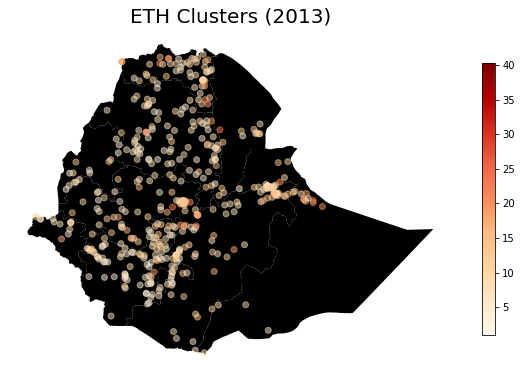

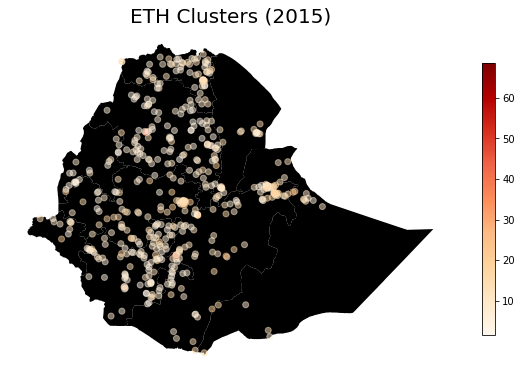

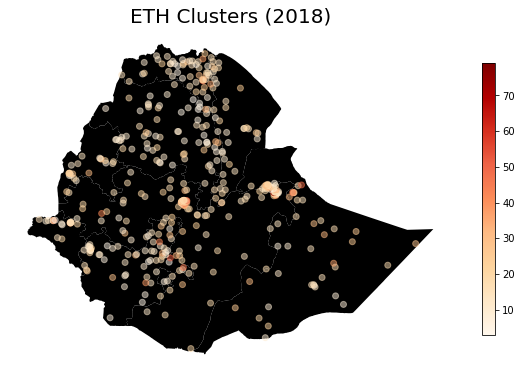

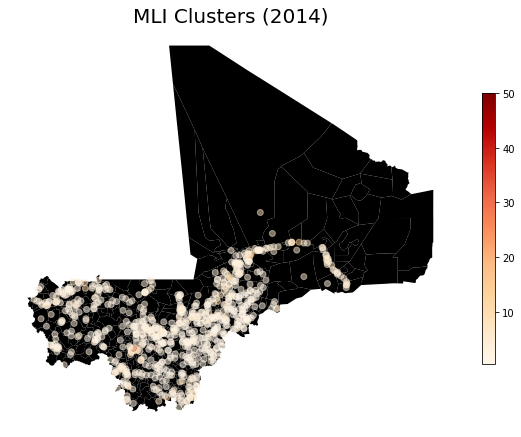

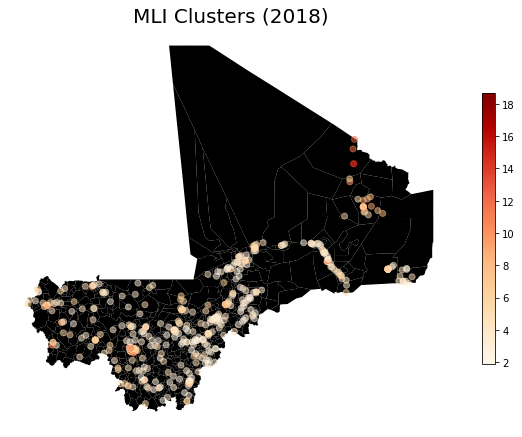

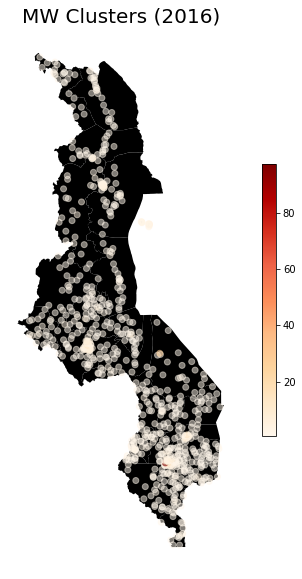

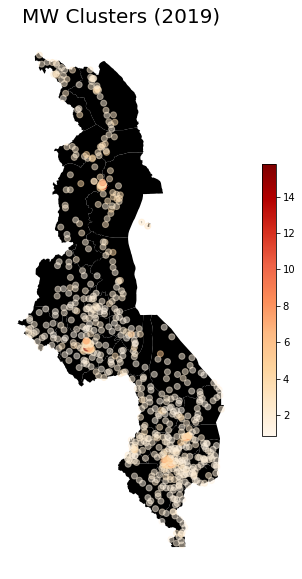

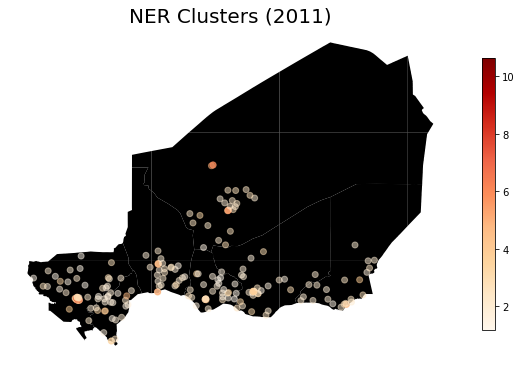

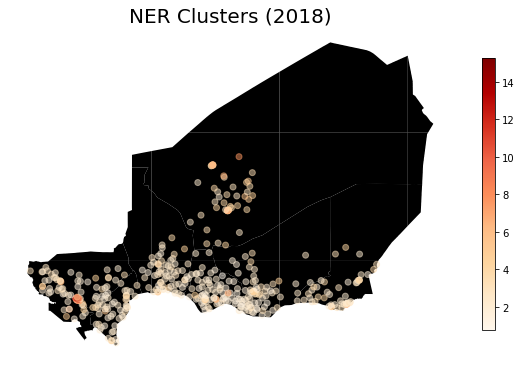

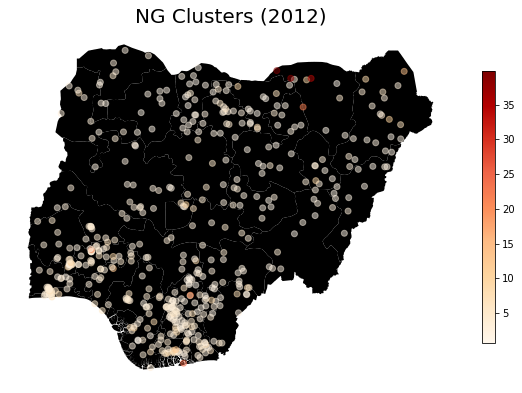

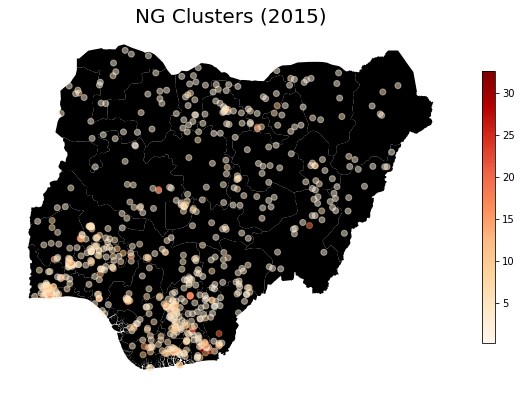

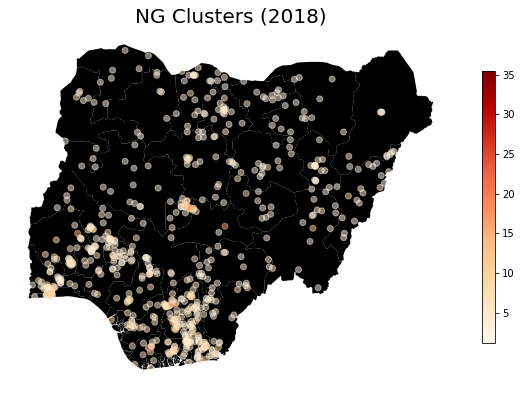

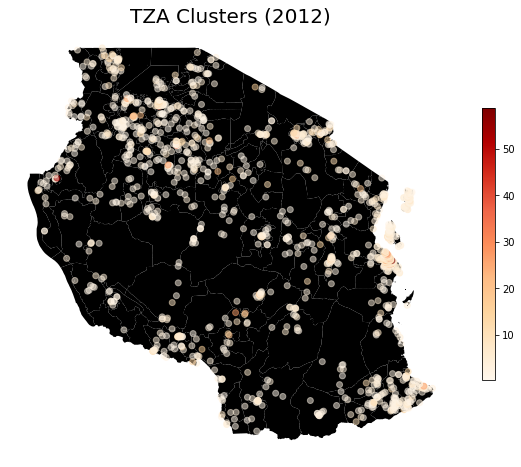

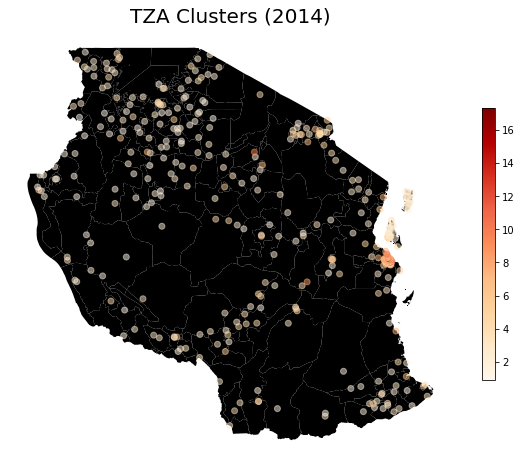

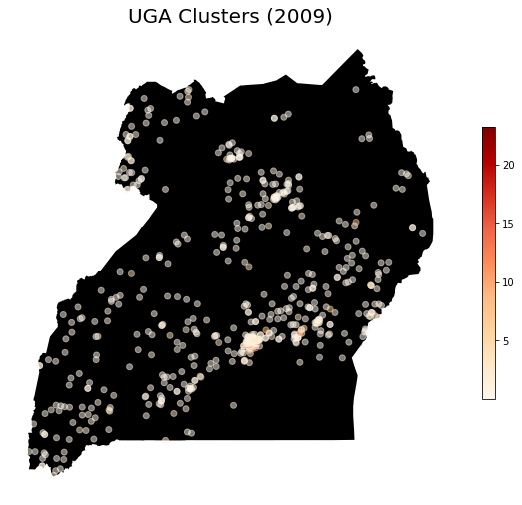

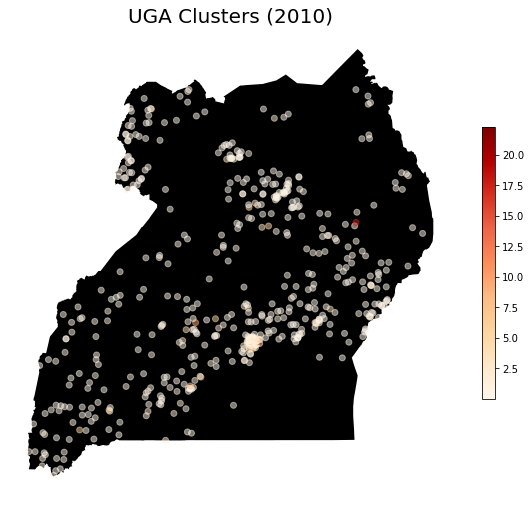

In [9]:
countries = df.groupby(["country"]).groups.keys()
for country in countries:
    shape = get_shape(country)
    tmp_df = df.loc[df.country == country]
    years = tmp_df.groupby(["year"]).groups.keys()
    for year in years:
        year_df = tmp_df.loc[tmp_df.year == year]
        fig, ax = plt.subplots(figsize = (10,10))
        ax.axis("off")
        ax.set_title(f"{country} Clusters ({year})", fontsize=20)
        shape.to_crs(epsg=4326).plot(ax=ax, color="black")
        year_df.plot(column="cons_pc", ax=ax, cmap = "OrRd", alpha = .5, legend = True, legend_kwds={"shrink": 0.5})
        fig.savefig(f"{FIGS_PATH}/{country}_{year}_clusters.pdf", bbox_inches="tight", dpi=600)